In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler


In [2]:
# read data
churnData = pd.read_csv("DATA_Customer-Churn.csv")
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [3]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
arr = np.array(churnData["TotalCharges"].tolist())

In [5]:
churnData["TotalCharges"] = pd.to_numeric(arr, errors='coerce')

In [6]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
#df.fillna(df.mean())
churnData["TotalCharges"] = churnData["TotalCharges"].fillna(churnData["TotalCharges"].mean())

In [8]:
churnData["TotalCharges"].isna().sum()

0

In [9]:
churnData["Churn"] = list(map(lambda x:0 if x=="Yes" else 1, churnData["Churn"]))

In [10]:
churnData.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.734630
std,0.368612,24.559481,30.090047,2265.000258,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000
50%,0.000000,29.000000,70.350000,1400.550000,1.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


### Scale the features either by using normalizer or a standard scaler.

In [11]:
X = churnData.drop("Churn", axis=1)
y = churnData["Churn"]

In [12]:
X=X._get_numeric_data()
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [13]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20,random_state=123)


In [14]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [15]:
X_train.shape


(5634, 4)

In [16]:
X_test_scaled=std_scaler.transform(X_test)


In [17]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.4377492  -1.28604714  0.15590893 -0.98351313]
 [-0.4377492   1.60904079  0.08435813  1.05761551]
 [ 2.28441306 -0.47052941  0.14758907 -0.36022238]
 ...
 [-0.4377492  -0.75596062  0.75161094 -0.45608427]
 [ 2.28441306 -0.14432232 -0.96560826 -0.55961865]
 [-0.4377492  -1.20449537  0.5269747  -0.91122311]]
--------
[[-0.4377492  -0.7967365  -1.14864519 -0.84476508]
 [-0.4377492   0.100333   -1.37660937 -0.66075815]
 [-0.4377492  -0.59285707 -1.50806316 -0.87711819]
 ...
 [-0.4377492  -1.08216771  0.68838    -0.79720002]
 [-0.4377492   1.36438548 -0.33329887  0.59651163]
 [-0.4377492   1.60904079 -1.48310358 -0.36638699]]


### Fit a logistic Regression model on the training data.
### Fit a Knn Classifier model on the training data

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

,Error_metric,Train,Test
0,Accuracy,0.793042,0.781405
1,Precision,0.821759,0.805004
2,Recall,0.918971,0.919212


Confusion matrix for the train set
[[ 646  829]
 [ 337 3822]]


/Users/tuncaynasibli/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


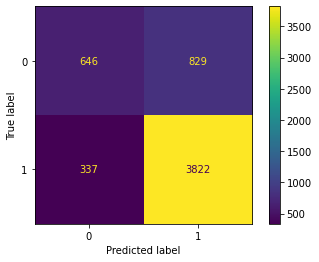



Confusion matrix for the test set
[[168 226]
 [ 82 933]]


/Users/tuncaynasibli/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


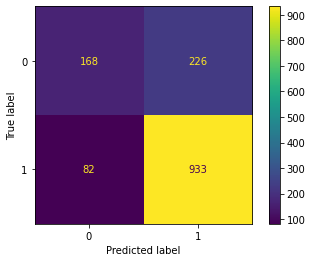

In [19]:
log = LogisticRegression() 

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log.fit(X_train_mod, y_train)

y_pred_train_log = log.predict(X_train_mod)
y_pred_test_log = log.predict(X_test_mod)



performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log,)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd')
plt.show()

## KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# initialize model (set parameters)
#neigh = KNeighborsClassifier(n_neighbors=3) # n_neighbors = K

,Error_metric,Train,Test
0,Accuracy,0.864503,0.749172
1,Precision,0.889006,0.803604
2,Recall,0.932563,0.868267


Confusion matrix for the train set
[[ 874  423]
 [ 245 3388]]


/Users/tuncaynasibli/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


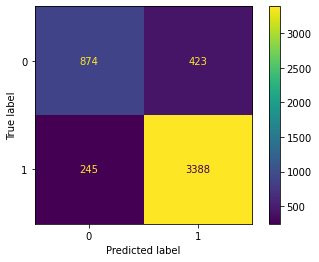



Confusion matrix for the test set


ValueError: Found input variables with inconsistent numbers of samples: [2113, 1409]

In [28]:

trans = PowerTransformer()
trans.fit(X_train)

X_train_k = trans.transform(X_train)
X_test_k  = trans.transform(X_test)

X_train_k = pd.DataFrame(X_train, columns = X.columns)
X_test_k  = pd.DataFrame(X_test,  columns = X.columns)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_k, y_train)
y_pred_train_knn = neigh.predict(X_train_k)
y_pred_test_knn = neigh.predict(X_test_k)

performance_knn = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn),
                                         recall_score(y_train, y_pred_train_knn)],
                               'Test': [accuracy_score(y_test, y_pred_test_knn),
                                        precision_score(y_test, y_pred_test_knn),
                                        recall_score(y_test, y_pred_test_knn)]})

display(performance_knn)
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_knn))
plot_confusion_matrix(neigh,X_train_k,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(neigh,X_test_k,y_test, values_format = 'd')
plt.show()

Round 2

Fit a Decision Tree Classifier on the training data.
Check the accuracy on the test data.

In [24]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20,random_state=123)


In [26]:
X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3993,0,70,66.00,4891.50
3148,0,47,75.45,3545.10
3531,0,16,19.35,295.55
4403,0,32,62.45,2045.55
1859,0,52,85.35,4338.60
...,...,...,...,...
1293,0,67,111.20,7530.80
4023,0,42,19.80,849.90
5200,0,70,106.50,7397.00
3775,1,41,98.40,4187.75


,Error_metric,Train,Test
0,Accuracy,0.787018,0.778514
1,Precision,0.815385,0.799219
2,Recall,0.919075,0.929916


Confusion matrix for the train set
[[ 541  294]
 [ 756 3339]]


/Users/tuncaynasibli/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


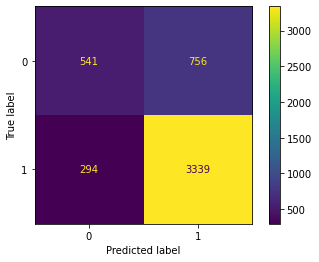



Confusion matrix for the test set
[[ 212  108]
 [ 360 1433]]


/Users/tuncaynasibli/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


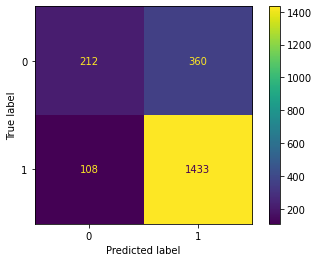

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

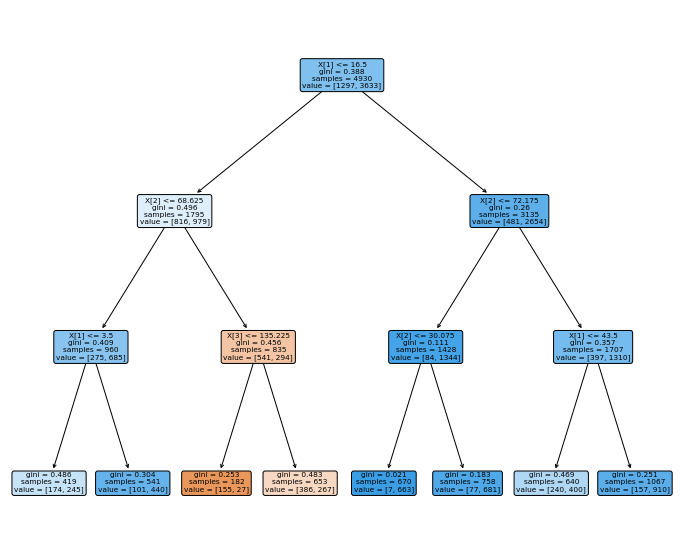

In [29]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,10))

plot_tree(dt,filled = True, rounded=True)
plt.show() 